<h1 > Data Analysis </h1>

<ul>
  <li>Framework de trabajo</li>
  <li>Python</li>
  <li>Jupyter notebook</li>
</ul>

<h2 > Python </h2>

<ul>
  <li>Simple con énfasis en la claridad del código</li>
  <li>Ampliamente utilizado por las comunidades científicas y privadas</li>
  <li>Cuenta con un amplio catálogo de librerías, algunas de ellas son:</li>
    <ul>
      <li>Pandas</li>
      <li>Numpy</li>
      <li>Matplotlib</li>
    </ul>
</ul>

<h2> Jupyter notebook </h2>

<ul>
  <li>Jupyter funciona como un punto intermedio entre el kernel de Python y Markdown</li>
  <li>Nos permite crear documentos con visualización y narrativa</li>
  <li>Existen dos tipos de celdas:</li>
    <ul>
      <li>Markdown</li>
      <li>Code</li>
     </ul>
   <li>Existen kernels en múltiples lenguajes</li>
</ul>

<h1> Flujo de Trabajo General </h1>

<ul>
  <li>Identificar naturaleza de los datos</li>
  <li>Identificar estructura de las variables</li>
  <li>Análisis:</li>
    <ul>
      <li>Análisis exploratorio</li>
      <li>Feature engineering</li>
     </ul>
   <li>Estrategía de modelación</li>
</ul>

<img src="images/1.png" alt="">


<ul>
  <li>En el aprendizaje supervisado, los algoritmos trabajan con datos “etiquetados” (labeled data)</li>
  <li>El aprendizaje no supervisado tiene lugar cuando no se dispone de datos “etiquetados”  para el entrenamiento.</li>
</ul>

<h1> Análisis Econométrico </h1>

<h3> Modelo de Regresión Lineal (Econometría | Regresión)<h3> 

$$\displaystyle Y=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon $$

Para estimar los parámetros utilizamos el método de los mínimos cuadrados, donde buscamos resolver

<img src="images/2.png" alt="">

<ul>
  <li>Supuestos Gauss-Markov.</li>
  <ul>
  <li>Modelo poblacional es lineal en sus parámetros.</li>
  <li>Muestra aleatoria de tamaño n representativa de la población</li>
  <li>Le media del error es cero</li>
  <li>Varianza de los errores constante</li>
  <li>Ninguna variable x es constante ni tiene una correlación lineal exacta con otra (no multicolinealidad)</li>
  <li>El error debe distribuirse de forma normal</li>
</ul>
</ul>

In [1]:
import pandas as pd
import numpy as np

#Importamos librerias
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("data/Credit.csv").drop(columns="Unnamed: 0")
df.sample(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
72,22.939,4923,355,1,47,18,Female,No,Yes,Asian,663
353,41.868,4716,342,2,47,18,Male,No,No,Caucasian,425
383,14.292,3274,282,9,64,9,Male,No,Yes,Caucasian,382
344,48.218,5199,401,7,39,10,Male,No,Yes,Asian,633
338,41.365,5303,377,1,45,14,Male,No,No,Caucasian,606


In [3]:
# instancia de modelo
model = smf.ols("Income ~ Age", data=df)

# Fit del modelo
model_fited = model.fit()

In [4]:
model_fited.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     12.62
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           0.000426
Time:                        20:57:27   Log-Likelihood:                -1985.8
No. Observations:                 400   AIC:                             3976.
Df Residuals:                     398   BIC:                             3983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2762      5.876      4.302      0.000      13.725      36.827
Age            0.3582      0.101      3.553      0.000       0.160       0.556
==============================================================================
Omnibus:                      132.309   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              317.897
Skew:                           1.674   Prob(JB):                     9.32e-70
Kurtosis:                       5.805   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model_fited.bic

3983.4845242631986

<h2> Modelo de Regresión Lógistica (Econometría|clasificación)<h2> 

<ul>
  <li>La regresión logística busca análizar los determinantes de un fenomeno discreto, con dos categorías.</li>
  <ul>
  <li>Clasificación de Spam: ¿ Este mail es smap o no es spam? Y {0:no, 1:si}.</li>
  <li>¿La foto pertenece a un gato a a un perro? Y {0:no, 1:si}</li>
</ul>
</ul>

<h3> Modelo de probabilidad lineal </h3>

<ul>
  <li>Regresión lineal donde asumimos que los parámetros miden la probabilidad de ocurrencia de Y.</li>
</ul>

$$\displaystyle Y=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon $$

<ul>
  <li>Problemas.</li>
    <ul>
  <li>La predicción probabilistica no tiene limites entre 0 y 1</li>
   <li>Limitación de forma funcional de la recta</li>
</ul>
</ul>


<h3> Modelo de regresión logística </h3>

<ul>
  <li>Mientras la regresión lineal se optimiza mediante la reducción de los errores cuadráticos, la regresión logística se optimiza mediante el método de Máxima Verosimilitud.</li>
  <li>Para el caso de la regresión Logística modelamos los parámetros como lineales en los log-odds.</li>

</ul>
<img src="images/3.png" alt="">

In [8]:
df = pd.read_csv("data/southafricanheart.csv").drop(columns="Unnamed: 0")
df["famhist"] = np.where(df["famhist"] == "Present",1 , 0)

In [9]:
df.sample(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
314,190,5.15,6.03,36.59,0,42,30.31,72.00,50,0
55,152,5.99,7.99,32.48,0,45,26.57,100.32,48,0
28,144,4.09,5.55,31.40,1,60,29.43,5.55,56,0
161,208,27.40,3.12,26.63,0,66,27.45,33.07,62,1
14,112,9.65,2.29,17.20,1,54,23.53,0.68,53,0


In [10]:
# instancia del modelo logistico
modelo = smf.logit("chd ~ famhist", data=df)

# fit del modelo
modelo_fited = modelo.fit()

modelo_fited.summary()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Mar 2020   Pseudo R-squ.:                 0.05740
Time:                        21:12:28   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist        1.1690      0.203      5.751      0.000       0.771       1.567
==============================================================================
"""

In [11]:
# funcion logistica inversa para obtener la probabilidad
def inverse_logit(x):
    return 1 / (1 + np.exp(-x))



In [12]:
eq = modelo_fited.params["Intercept"] +  modelo_fited.params["famhist"] * 1


prob = inverse_logit(eq)
print(f"Una persona CON antecedentes familiares tiene una probabilidad de {prob} de tener una enfermedad coronaria")

Una persona CON antecedentes familiares tiene una probabilidad de 0.5 de tener una enfermedad coronaria


In [13]:
eq = modelo_fited.params["Intercept"] +  modelo_fited.params["famhist"] * 0
prob = inverse_logit(eq)
print(f"Una persona SIN antecedentes familiares tiene una probabilidad de {prob} de tener una enfermedad coronaria")

Una persona SIN antecedentes familiares tiene una probabilidad de 0.23703703703703694 de tener una enfermedad coronaria


<h2> Análisis Factorial (Econometría|Dimensionalidad)<h2> 



<ul>
<li>Objetivo: Extraer variabilidad conjunta y convertirlas en factores latentes</li>
<li>Diferencia con PCA</li>    
    <ul>
    <li>PCA: Orientado a maximizar la varianza de los eigenvalues</li>
    <li>Análisis Factorial: Orientado a generar componentes o factores conceptualmente significativos</li>
    </ul>
</ul>



In [14]:
import factor_analyzer as factor
import matplotlib.pyplot as plt

df = pd.read_csv("data/cep45.csv")
trust_df = df.filter(regex="p17_*")

trust_df = trust_df.rename(columns={'p17_a': 'I.Catolica', 'p17_b': 'I.Evangelica', 'p17_c': 'FFAA', 'p17_d':
'Justicia','p17_e': 'Prensa', 'p17_f': 'Television', 'p17_g':'Sindicatos', 'p17_h':'Carabineros',
'p17_i': 'Gobierno', 'p17_j': 'PartidosPol', 'p17_k': 'Congreso', 'p17_l':'Empresas','p17_m':'Universidades', 'p17_n':'Radio'})

trust_df.sample(5)

,I.Catolica,I.Evangelica,FFAA,Justicia,Prensa,Television,Sindicatos,Carabineros,Gobierno,PartidosPol,Congreso,Empresas,Universidades,Radio
917,1,2,1,3,3,3,1,3,3,4,3,3,3,1
707,3,3,2,2,3,3,3,2,3,3,3,3,2,3
1036,2,3,2,2,3,4,4,2,2,4,3,2,2,4
987,1,3,1,1,2,2,2,1,2,4,2,2,1,2
214,4,1,2,3,3,3,8,3,2,3,3,3,2,2


In [33]:
trust_df.shape

(1503, 14)

In [15]:
trust_df.describe()

,I.Catolica,I.Evangelica,FFAA,Justicia,Prensa,Television,Sindicatos,Carabineros,Gobierno,PartidosPol,Congreso,Empresas,Universidades,Radio
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2.662675,3.092482,2.846973,3.250832,3.074518,2.858949,3.387891,2.590818,2.869594,3.482369,3.236194,3.027279,2.730539,2.553560
std,1.376030,1.704179,1.469350,1.292310,1.209608,1.067651,1.707440,1.198466,1.280926,1.101773,1.326557,1.330749,1.720455,1.226494
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [16]:
factor.calculate_bartlett_sphericity(trust_df)

(6644.835705911846, 0.0)

In [17]:
factor.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]),
 0.9274657194111274)

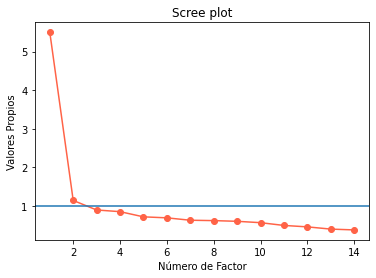

In [25]:
#Generamos una nueva instancia en el objeto factorize
factorize = factor.FactorAnalyzer(n_factors=2, rotation='varimax')

# Implementamos el análisis
factorize.fit(trust_df)

# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]

# graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.plot(range(1,len(factor_screeplot)+1), factor_screeplot, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')

# visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot");

In [26]:
factor_loadings = factorize.loadings_
factor_loadings = pd.DataFrame(factor_loadings,columns=["Factor1","Factor2"], index=trust_df.columns)

In [28]:
factor_loadings.applymap(lambda x: np.where(x < .5, ' ', round(x, 2)))

,Factor1,Factor2
I.Catolica,,
I.Evangelica,,
FFAA,,
Justicia,,
Prensa,,0.51
Television,,0.7
Sindicatos,0.51,
Carabineros,,0.57
Gobierno,0.51,
PartidosPol,0.67,


In [29]:
factorize.get_factor_variance()

(array([2.8546665 , 2.64039588]),
 array([0.20390475, 0.18859971]),
 array([0.20390475, 0.39250446]))

In [30]:
factors_predicted = factorize.transform(trust_df)

In [31]:
factors_predicted

array([[-0.67809168,  0.33784116],
       [-0.0480973 , -0.00985878],
       [ 0.54219961,  0.42465027],
       ...,
       [-0.22806842,  0.13539122],
       [-0.03749915, -0.04883834],
       [ 4.13069653, -0.00732222]])

In [32]:
factors_predicted.shape

(1503, 2)

<h1> Machine Learning </h1>

<h2> PCA (Machine Learning|Dimensionalidad)<h2> 

In [34]:
from sklearn.datasets import load_digits
df = load_digits()

In [41]:
df.data[8].reshape([8, 8])

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

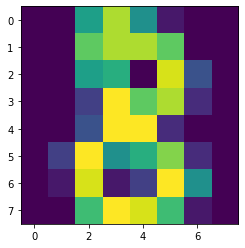

In [38]:
plt.imshow(df.data[8].reshape([8, 8]));

In [39]:
print("Dimensión original de la base:",df.data.shape)

Dimensión original de la base: (1797, 64)


In [43]:
from sklearn.decomposition import PCA

# Instancia del modelo
dimred = PCA(n_components = 2)

# Entrenamiento y transformación
project_x = dimred.fit_transform(df.data)

In [44]:
print("La nueva dimensión de la base es de:",project_x.shape)

La nueva dimensión de la base es de: (1797, 2)


#### Visualización de las componentes

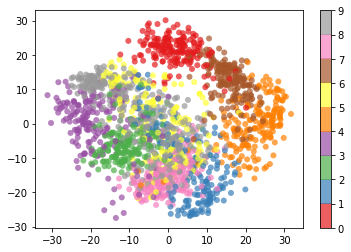

In [45]:
plt.scatter(project_x[:, 0], project_x[:, 1],c=df.target, edgecolor='none', alpha=.7, cmap='Set1')
plt.colorbar();

In [46]:
print("La varianza explicada de cada dimensión es de:",dimred.explained_variance_ratio_)
print("En conjunto, ambas dimensiones explican la varianza en un: ",
sum(dimred.explained_variance_ratio_))

La varianza explicada de cada dimensión es de: [0.14890594 0.13618771]
En conjunto, ambas dimensiones explican la varianza en un:  0.2850936482369253


#### Definiendo el n° de componentes

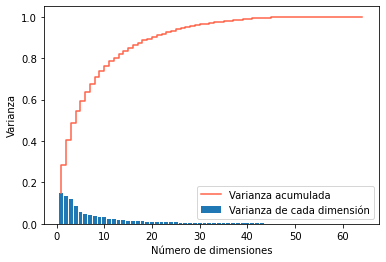

In [47]:
# instancia del modelo sin n_components
fetch_dims = PCA().fit(df.data)

# dim de componentes
dims_quant = len(fetch_dims.components_)

plt.bar(range(1, dims_quant + 1),
        fetch_dims.explained_variance_ratio_,
        label="Varianza de cada dimensión")

plt.step(range(1,len(fetch_dims.components_) + 1),
         np.cumsum(fetch_dims.explained_variance_ratio_),
        color='tomato', label="Varianza acumulada")

plt.xlabel('Número de dimensiones')
plt.ylabel('Varianza')
plt.legend();



In [48]:
pca = PCA(n_components=10)

project_x = pca.fit_transform(df.data)
                              
print("Varianza acumulada con 10 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 10 dimensiones: 0.7382257081081238


In [49]:
project_x

array([[ -1.2594416 ,  21.27489276,  -9.46299989, ...,   2.56111135,
         -0.57459575,   3.64661355],
       [  7.95768332, -20.76877452,   4.43941463, ...,  -4.60697254,
          3.57641708,  -1.05084006],
       [  6.99185941,  -9.9559136 ,   2.95869335, ..., -16.41950978,
          0.75587013,   4.22364962],
       ...,
       [ 10.80115315,  -6.96014007,   5.59972653, ...,  -7.41934811,
         -3.91741924, -13.09413253],
       [ -4.87211866,  12.42396108, -10.17079042, ...,  -4.35112489,
          3.96544142, -13.15200741],
       [ -0.34451263,   6.36565133,  10.7738653 , ...,   0.66407783,
         -4.07585736, -12.59585849]])